### 1. Import libraries

### 2. Import data

### 3. Clean data
  <ul>
<li>3.1 Check columns</li>
    <li>3.2 Missing values</li>
    <li>3.3 Duplicates check</li>
  </ul>

### 4. Scatterplot
  <ul>
<li>4.1 Scatterplot of entire dataframe</li>
    <li>4.2 Scatterplot of subset</li>
    <li>4.3 Scatterplot of sample</li>
  </ul>

### 5. Regression analysis
  <ul>
<li>5.1 Compare regression with training set</li>
    <li>5.2 Compare the predicted and the actual y-values.</li>
  </ul>

# 1. Import libraries

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Display charts without print them specifically.

%matplotlib inline

# 2. Import data

In [57]:
# Creata a path

path = r'/Users/marie/Documents/CareerFoundry/11-2021 City Temperatures'

In [58]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'city_temperatures_more_clean.csv'))

# 3. Clean data

### 3.1 Check columns

In [59]:
# Check columns

df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Region', 'Country', 'City', 'Month',
       'Day', 'Year', 'AvgTemperature'],
      dtype='object')

In [60]:
# Drop columns I don´t need for the analysis

df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'City'], axis=1, inplace = True)

In [61]:
# Check output

df.columns

Index(['Region', 'Country', 'Month', 'Day', 'Year', 'AvgTemperature'], dtype='object')

In [62]:
# Check shape

df.shape

(2867077, 6)

### 3.2 Missing values

In [63]:
# Check for missing values

df.isnull().sum()

Region            0
Country           0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

#### No missing values in the dataset

### 3.3 Duplicates check

In [64]:
# Check for duplicates

dups = df.duplicated()

In [65]:
# Print "dups"

dups.shape

(2867077,)

#### No duplicates in the dataset

# 4. Scatterplot

### 4.1 Scatterplot of entire dataframe

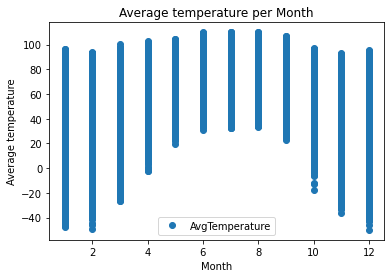

In [121]:
# Create a scatterplot using matplotlib.

df.plot(x = 'Month', y='AvgTemperature',style='o')
plt.title('Average temperature per Month')  
plt.xlabel('Month')  
plt.ylabel('Average temperature')  
plt.show()

#### There are too many datapoints in my dataset so I decided to make a subset of the year 2019.

### 4.2 Scatterplot of subset

In [164]:
# Create a subset to see if the datapoints get less

sub = df[df['Year']>2018]

In [165]:
sub.head()

,Region,Country,Month,Day,Year,AvgTemperature
8767,Africa,Algeria,1,1,2019,50.6
8768,Africa,Algeria,1,2,2019,49.9
8769,Africa,Algeria,1,3,2019,50.9
8770,Africa,Algeria,1,4,2019,50.6
8771,Africa,Algeria,1,5,2019,49.7


In [166]:
sub.shape

(106337, 6)

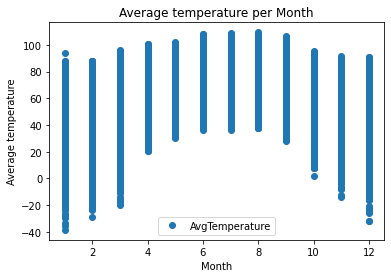

In [119]:
# Create a Scatterplot usin the sub dataframe.

sub.plot(x = 'Month', y='AvgTemperature',style='o') 
plt.title('Average temperature per Month')  
plt.xlabel('Month')  
plt.ylabel('Average temperature')  
plt.show()

#### It didn't helped a lot. There are still so many datapoints that the Scatterplot makes "lines" instead of dots. I'll make a sample of the dataframe and see if it helps.

### 4.3 Scatterplot of sample

In [122]:
# Create a sample of the dataframe to reduce it.

sample = sub.sample(frac=2, replace=True, random_state=1)

In [123]:
# Print sample

sample.shape

# More rows than my subset.

(212674, 6)

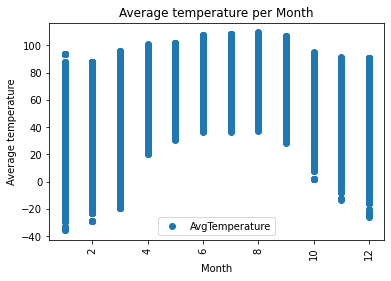

In [124]:
# Create a Scatterplot from my sample.

sample.plot(x = 'Month', y='AvgTemperature',style='o') 
plt.title('Average temperature per Month')  
plt.xlabel('Month')  
plt.ylabel('Average temperature')  
plt.tick_params(axis='x', labelrotation=90)
plt.show()

#### Didn't make it visually clearer. I'll use the first Scatterplot with my entire dataframe. 

# 5. Regression analysis

In [143]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Month'].values.reshape(-1,1)
y = df['AvgTemperature'].values.reshape(-1,1)

In [144]:
X

array([[1],
       [1],
       [1],
       ...,
       [7],
       [7],
       [7]])

In [145]:
y

array([[64.2],
       [49.4],
       [48.8],
       ...,
       [84.2],
       [83.8],
       [83.6]])

In [146]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [147]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [148]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [149]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

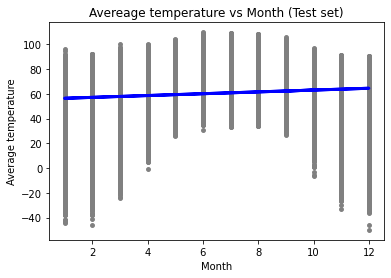

In [150]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Avereage temperature vs Month (Test set)')
plot_test.xlabel('Month')
plot_test.ylabel('Average temperature')
plot_test.show()

#### This is really interesting! You can see on the line that the temperature rises over time.

In [151]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [152]:
# Print the model summary statistics. (Evaluate the performance of the model).

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.73756741]]
Mean squared error:  348.29720764103973
R2 score:  0.01786541467282965


### 5.1 Compare how the regression fits the training set

In [155]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [156]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [157]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.73756741]]
Mean squared error:  348.2793769220749
R2 score:  0.018225720424957736


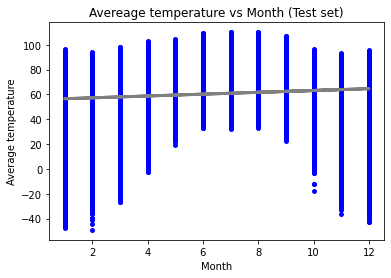

In [159]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='grey', linewidth =3)
plot_test.title('Avereage temperature vs Month (Test set)')
plot_test.xlabel('Month')
plot_test.ylabel('Average temperature')
plot_test.show()

#### The test set and the training set match match well, look the same.

### 5.2 Compare the predicted y values with the actual y values.

In [162]:
y_predicted

array([[63.12065089],
       [57.95767901],
       [58.69524642],
       ...,
       [56.48254418],
       [58.69524642],
       [62.38308348]])

In [163]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,39.5,63.120651
1,79.1,57.957679
2,58.8,58.695246
3,62.2,57.957679
4,72.3,60.170381
5,38.1,63.120651
6,64.0,58.695246
7,23.7,64.595786
8,87.4,61.645516
9,31.5,64.595786


#### Some of the values between actual and predicted, for example index 20, differs a lot.